 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

figure(figsize=(8, 6), dpi=80)

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_path, index_col = 'Date',infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop missing values
whale_returns_df = whale_returns_df.dropna()

# Validate no more missing values
whale_returns_df.isnull().sum()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_path, index_col = 'Date',infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().mean() * 100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

# Validate no more missing values
algo_returns_df.isnull().sum()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_close_path = Path('Resources/sp500_history.csv')
sp500_close_df = pd.read_csv(sp500_close_path, index_col = 'Date',infer_datetime_format=True, parse_dates=True)
sp500_close_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_close_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_close_df["Close"] = sp500_close_df["Close"].str.replace("$", "", regex = False)

sp500_close_df['Close'] = sp500_close_df['Close'].astype(float)

sp500_close_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_close_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
#Count nulls
sp500_daily_returns.isnull().mean() * 100
sp500_daily_returns.isnull().sum()

# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

# Validate no more missing values
sp500_daily_returns.isnull().sum()
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {'Close':'S&P 500'}, inplace = True)

# Print first few rows of S&P 500 data
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='columns',join='inner')
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

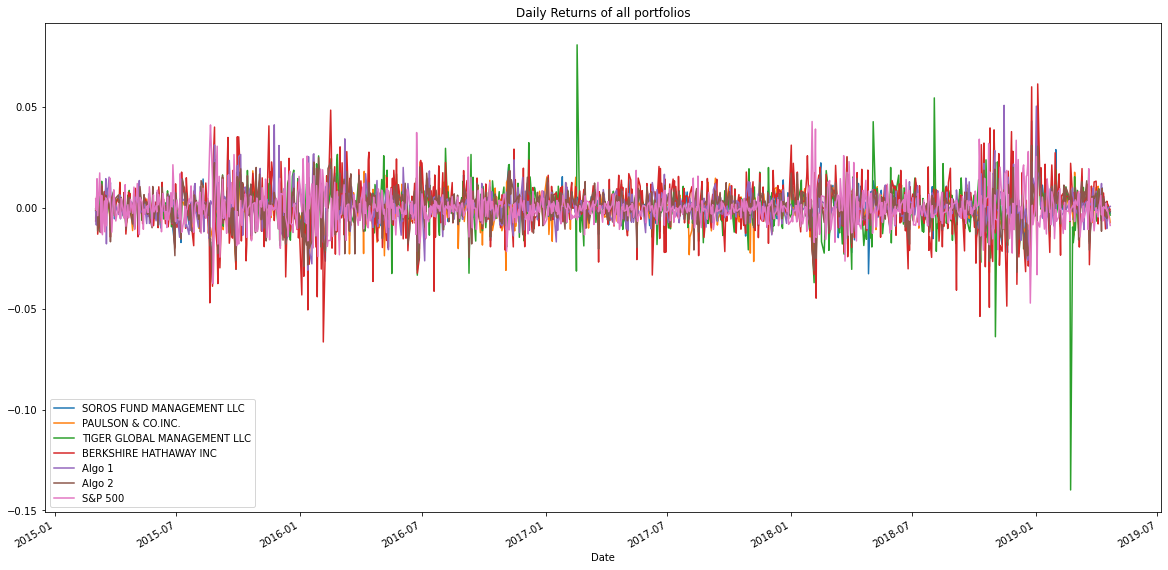

In [15]:
# Plot daily returns of all portfolios

daily_returns = joined_returns.plot(figsize=(20,10))
daily_returns.set_title('Daily Returns of all portfolios');


#### Calculate and Plot cumulative returns.

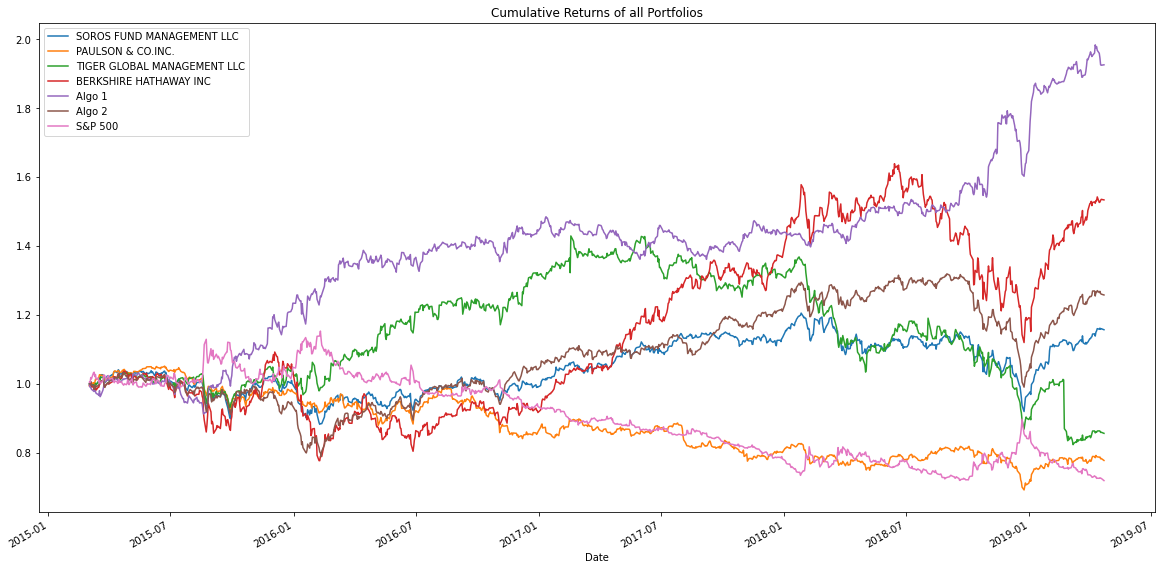

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+joined_returns).cumprod()


# Plot cumulative returns
cumulative_returns.plot(title = 'Cumulative Returns of all Portfolios', figsize=(20,10));


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


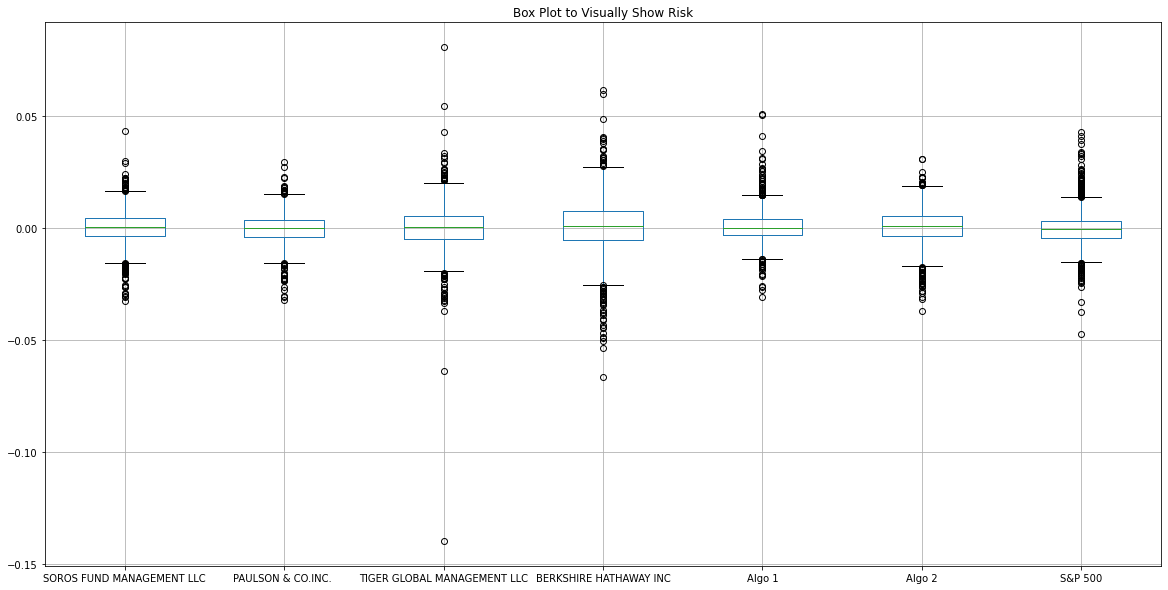

In [17]:
# Box plot to visually show risk
algo_1_box_plot = joined_returns.boxplot(figsize = (20,10))
algo_1_box_plot.set_title('Box Plot to Visually Show Risk');


### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_returns.std()

# Sort standard deviations in descending order
daily_std = daily_std.sort_values(ascending=False)
print(daily_std)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate the daily standard deviation of S&P 500
SP500_daily_std = joined_returns['S&P 500'].std()

# Determine which portfolios are riskier than the S&P 500
"""
This was my first attempt at determining which portfolios are riskier.  Had a hard time with the loop.
for row in daily_std:
    if row > SP500_daily_std:
        print(daily_std[row])
"""

#Richie Garafola helped me figure out a simpler way to determine which were riskier.  The funds whose values are True are more risky than the S&P 500.

daily_std > SP500_daily_std

# Berkshire Hathaway Inc. and Tiger Global Management LLC are riskier than the S&P 500.
        

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
S&P 500                        False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std = annualized_std.sort_values(ascending=False)
print(annualized_std)



BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

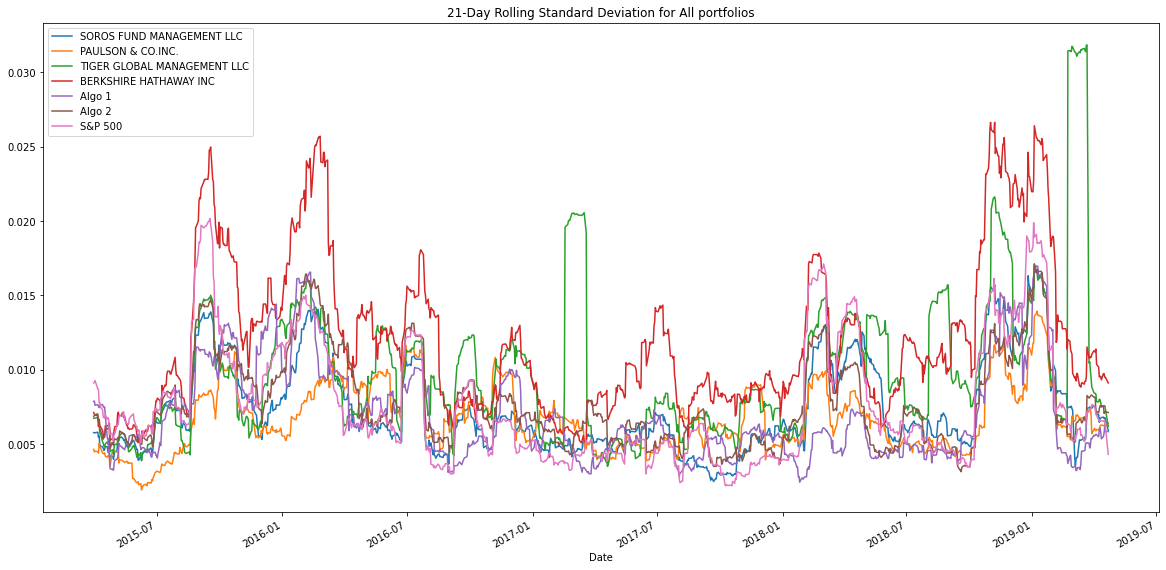

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = joined_returns.rolling(window=21).std()


# Plot the rolling standard deviation
rolling_std_plot = rolling_std.plot(figsize=(20,10));
rolling_std_plot.set_title('21-Day Rolling Standard Deviation for All portfolios');

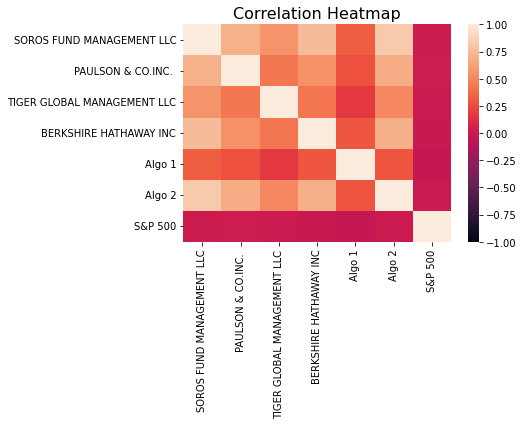

In [22]:
# Calculate the correlation
correlation = joined_returns.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1);

plt.title("Correlation Heatmap", fontsize =16);


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

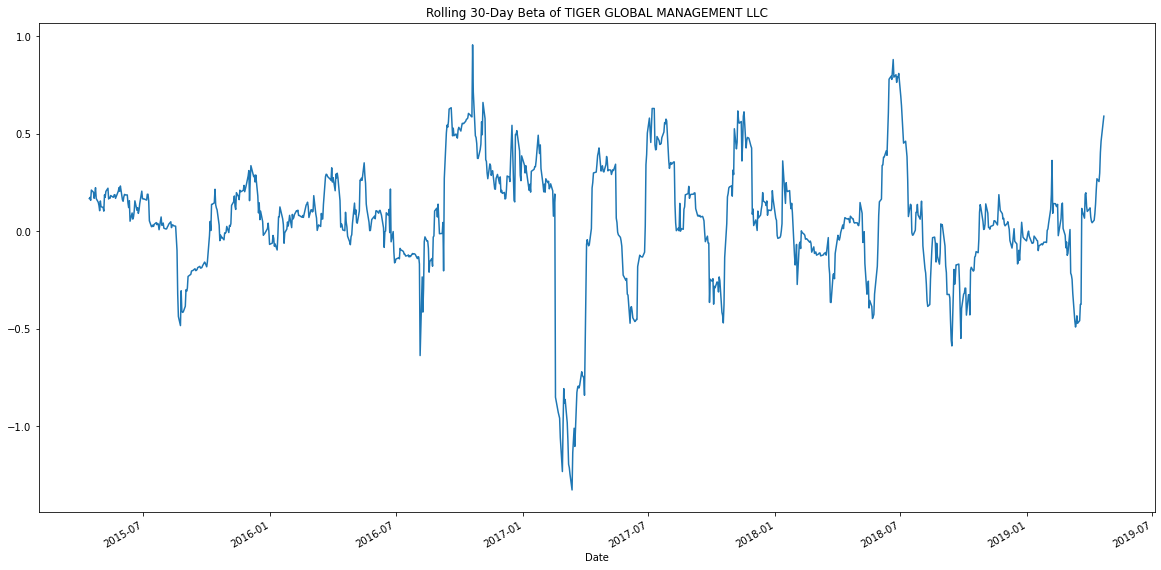

In [23]:
# Calculate covariance of a single portfolio - TIGER GLOBAL MANAGEMENT LLC
cov_tiger = joined_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(joined_returns['S&P 500'])
cov_tiger

# Calculate variance of S&P 500
sp500_variance = joined_returns['S&P 500'].var()
sp500_variance

# Computing beta
tiger_beta = cov_tiger / sp500_variance
tiger_beta

# Plot beta trend - use scatter plot
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_tiger_cov = joined_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(joined_returns['S&P 500'])

# Calculate 30-day rolling variance of S&P 500
rolling_SP500_var = joined_returns['S&P 500'].rolling(window=30).var()

# Calculate 30-day rolling beta of TIGER GLOBAL MANAGEMENT LLC
rolling_tiger_beta = rolling_tiger_cov / rolling_SP500_var

# Plot the 30-day rolling beta of TIGER GLOBAL MANAGEMENT LLC
rolling_tiger_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of TIGER GLOBAL MANAGEMENT LLC');


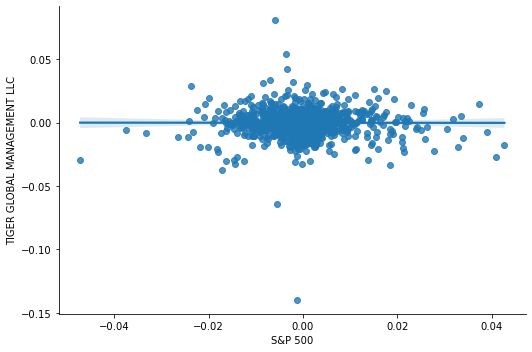

In [24]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='S&P 500', y='TIGER GLOBAL MANAGEMENT LLC', data=joined_returns, aspect=1.5, fit_reg=True);

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

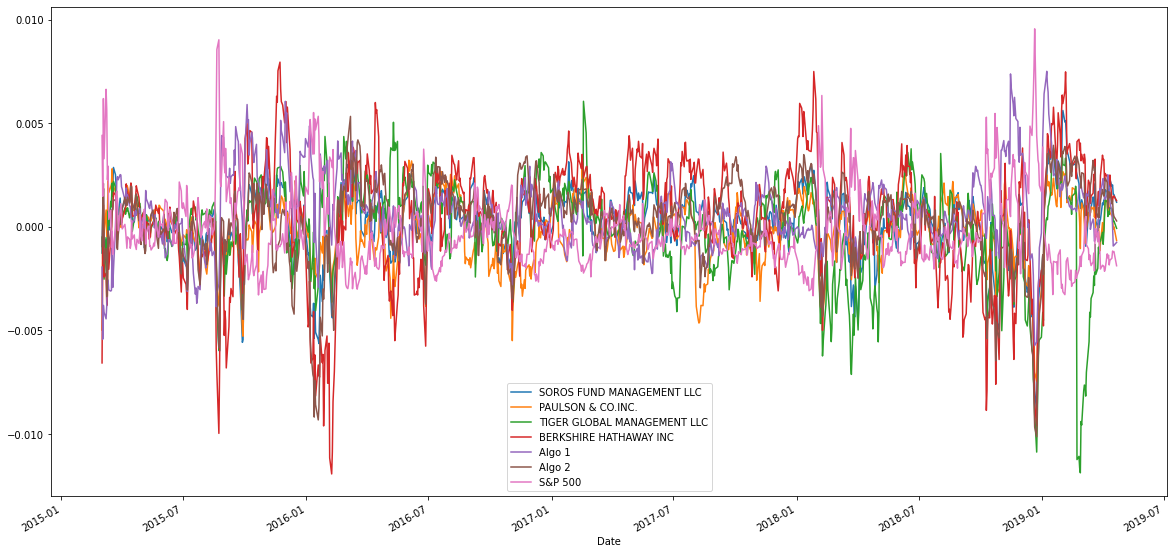

In [25]:
# Use `ewm` to calculate the rolling window
#ewm_df = joined_returns.ewm(halflife='21 days', std=pd.DatetimeIndex(times)).mean()

joined_returns.ewm(span=21, axis="index").mean().plot(figsize=(20,10));


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Assumed risk-free rate from 2012 - 2019 is 2.9% annually.
rf_rate = .029

# Annualized Sharpe Ratios
sharpe_ratios = ((joined_returns.mean() * 252) - rf_rate) / (joined_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.111538
PAULSON & CO.INC.             -0.751450
TIGER GLOBAL MANAGEMENT LLC   -0.297827
BERKSHIRE HATHAWAY INC         0.465334
Algo 1                         1.129932
Algo 2                         0.265323
S&P 500                       -0.731328
dtype: float64

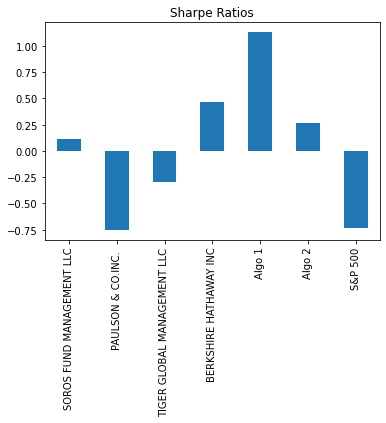

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios");

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed both the market and whales portfolios. Algo 2 outperformed the market. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

# Student Notes:  I selected mutual funds since this is what I would typically invest in.  Also, there are no stock splits in them.


In [28]:
# Reading data from 1st stock - MUTF: FOCPX (Fidelity OTC Portfolio)
FOCPX_path = Path('Resources/FOCPX.csv')
FOCPX_returns_df = pd.read_csv(FOCPX_path, index_col = 'Date',infer_datetime_format=True, parse_dates=True)
FOCPX_returns_df.head()

,FOCPX
Date,
2012-10-01,6.158
2012-10-02,6.170
2012-10-03,6.193
2012-10-04,6.248
2012-10-05,6.207


In [29]:
# Reading data from 2nd stock - MUTF: VHIAX (JPMOrgan Growth Advantage Class A Fund)
VHIAX_path = Path('Resources/VHIAX.csv')
VHIAX_returns_df = pd.read_csv(VHIAX_path, index_col = 'Date',infer_datetime_format=True, parse_dates=True)
VHIAX_returns_df.head()

,VHIAX
Date,
2012-10-01,10.06
2012-10-02,10.07
2012-10-03,10.13
2012-10-04,10.18
2012-10-05,10.16


In [30]:
# Reading data from 3rd stock - MUTF: GCGIX (Goldman Sachs Large Cap Growth Insights)
GCGIX_path = Path('Resources/GCGIX.csv')
GCGIX_returns_df = pd.read_csv(GCGIX_path, index_col = 'Date',infer_datetime_format=True, parse_dates=True)
GCGIX_returns_df.head()

,GCGIX
Date,
2012-10-01,14.94
2012-10-02,14.96
2012-10-03,15.07
2012-10-04,15.15
2012-10-05,15.11


In [31]:
# Combine all stocks in a single DataFrame
portfolio_returns = pd.concat([FOCPX_returns_df, VHIAX_returns_df, GCGIX_returns_df], axis='columns',join='inner')
portfolio_returns


,FOCPX,VHIAX,GCGIX
Date,,,
2012-10-01,6.158,10.06,14.94
2012-10-02,6.170,10.07,14.96
2012-10-03,6.193,10.13,15.07
2012-10-04,6.248,10.18,15.15
2012-10-05,6.207,10.16,15.11
...,...,...,...
2019-04-15,12.070,21.40,31.75
2019-04-16,12.100,21.42,31.69
2019-04-17,12.120,21.28,31.56


In [32]:
#Reset Date index
#Done - Above

In [33]:
# Reorganize portfolio data by having a column per symbol
#Done - Above

In [34]:
# Count nulls
portfolio_returns.isnull().mean() * 100
portfolio_returns.isnull().sum()

# Drop missing values
portfolio_returns = portfolio_returns.dropna()

# Validate no more missing values
portfolio_returns.isnull().sum()
portfolio_returns.head()

# Calculate daily returns
portfolio_daily_returns = portfolio_returns.pct_change()
portfolio_daily_returns.head()

# Drop NAs
portfolio_daily_returns = portfolio_daily_returns.dropna()

# Display sample data
portfolio_daily_returns.head()

,FOCPX,VHIAX,GCGIX
Date,,,
2012-10-02,0.001949,0.000994,0.001339
2012-10-03,0.003728,0.005958,0.007353
2012-10-04,0.008881,0.004936,0.005309
2012-10-05,-0.006562,-0.001965,-0.002640
2012-10-08,-0.006928,-0.007874,-0.004633


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

port_weighted = portfolio_daily_returns.dot(weights)


### Name the data column SCOTT
# Display sample data

port_weighted.head()


Date
2012-10-02    0.001427
2012-10-03    0.005680
2012-10-04    0.006375
2012-10-05   -0.003722
2012-10-08   -0.006478
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([joined_returns, port_weighted], axis='columns',join='inner')
all_returns.columns = ["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC","Algo 1","Algo 2","S&P 500","SCOTT"]
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,SCOTT
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.005514
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.002209
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.003081
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.012314
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.002796


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,SCOTT
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.005514
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.002209
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.003081
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.012314
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.002796


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
#Calculate daily 'std'
daily_std_all = all_returns.std()
daily_std_all = daily_std_all.sort_values(ascending=False)

In [39]:
# Calculate the annualized `std`
annual_std_all = daily_std_all * np.sqrt(252)
annual_std_all = annual_std_all.sort_values(ascending=False)
print(annual_std_all)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SCOTT                          0.167244
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64


### Calculate and plot rolling `std` with 21-day window

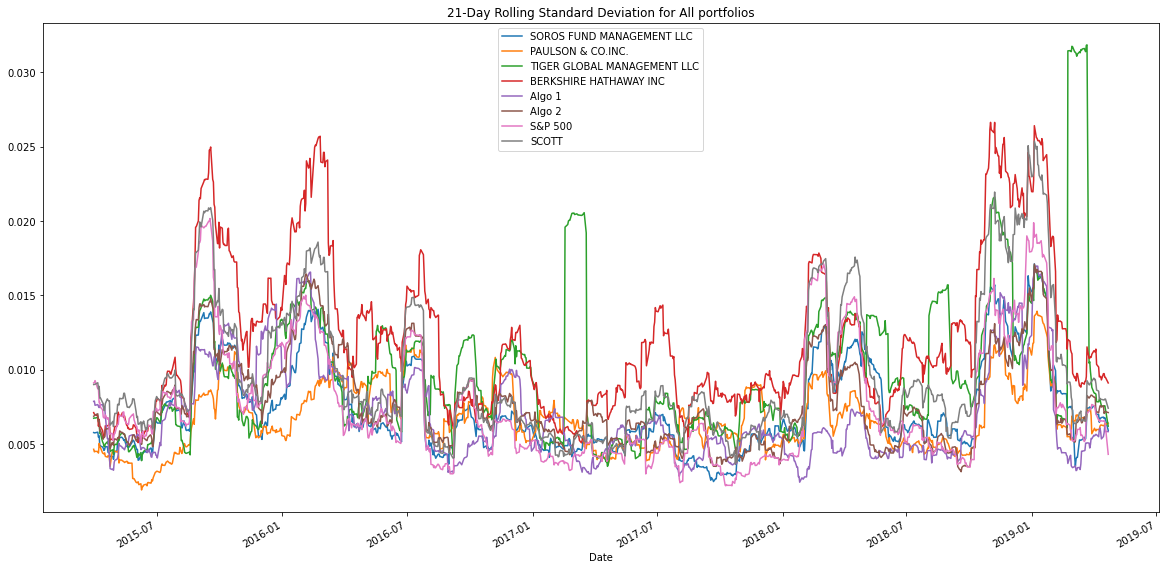

In [40]:
# Calculate rolling standard deviation
rolling_std_all = all_returns.rolling(window=21).std()


# Plot rolling standard deviation
rolling_std_all_plot = rolling_std_all.plot(figsize=(20,10));
rolling_std_all_plot.set_title('21-Day Rolling Standard Deviation for All portfolios');

### Calculate and plot the correlation

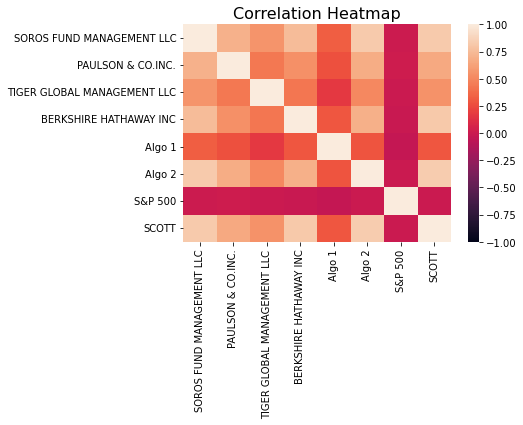

In [41]:
# Calculate and plot the correlation


# Calculate the correlation
correlation_all = all_returns.corr()
correlation_all


# Display the correlation matrix
sns.heatmap(correlation_all, vmin=-1, vmax=1);
plt.title("Correlation Heatmap", fontsize =16);

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

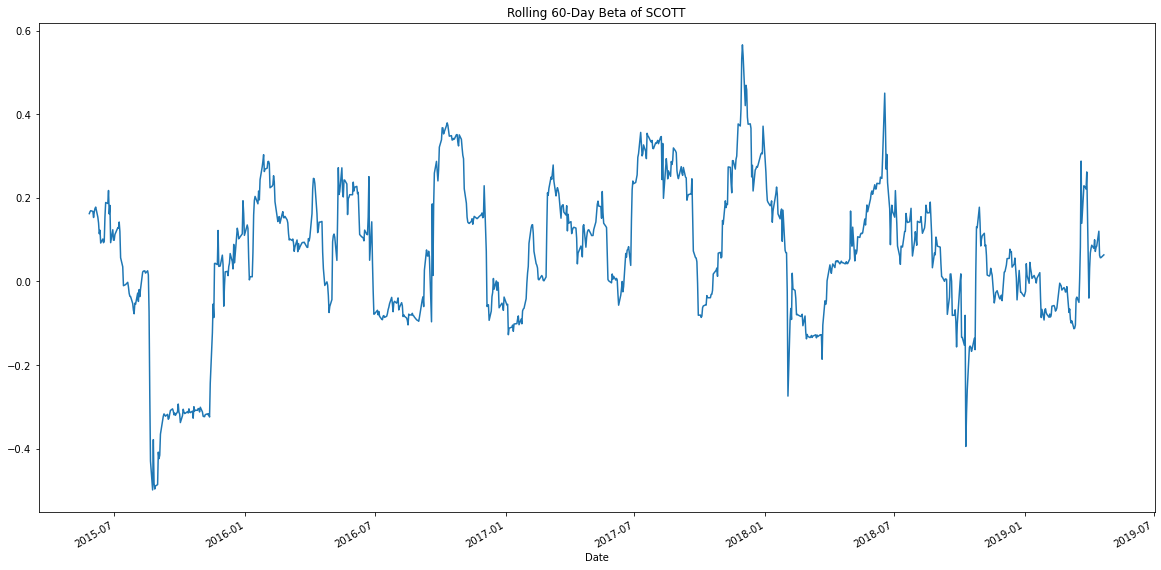

In [42]:
# Calculate and plot Beta

# Calculate covariance of my portfolio
cov_scott = all_returns['SCOTT'].cov(joined_returns['S&P 500'])
cov_scott

# Calculate variance of S&P 500.  Already calculated above.
sp500_variance

# Computing beta
beta_scott = cov_scott / sp500_variance
beta_scott

# Plot beta trend - use scatter plot
# Calculate 60-day rolling covariance of SCOTT vs. S&P 500 and plot the data
rolling_cov_scott = all_returns['SCOTT'].rolling(window=60).cov(all_returns['S&P 500'])

# Calculate 60-day rolling variance of S&P 500
rolling_SP500_var = all_returns['S&P 500'].rolling(window=60).var()

# Calculate 60-day rolling beta of SCOTT
rolling_beta_scott = rolling_cov_scott / rolling_SP500_var

# Plot the 60-day rolling beta of SCOTT
rolling_beta_scott.plot(figsize=(20, 10), title='Rolling 60-Day Beta of SCOTT');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_all = ((all_returns.mean() * 252) - rf_rate) / (all_returns.std() * np.sqrt(252))
#sharpe_ratios_all = (all_returns.mean() -0) / (all_returns.std() * np.sqrt(252))

# Sort descending
sharpe_ratios_all = sharpe_ratios_all.sort_values(ascending=False)

sharpe_ratios_all

Algo 1                         1.129932
BERKSHIRE HATHAWAY INC         0.465334
SCOTT                          0.385335
Algo 2                         0.265323
SOROS FUND MANAGEMENT LLC      0.111538
TIGER GLOBAL MANAGEMENT LLC   -0.297827
S&P 500                       -0.731328
PAULSON & CO.INC.             -0.751450
dtype: float64

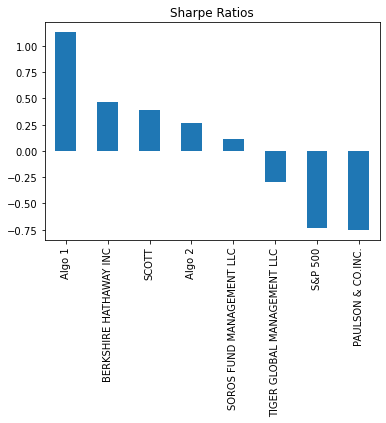

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios");



### How does your portfolio do?

Write your answer here!

In [ ]:
# Overall, my portfolio (SCOTT) performed better than the market, Algo 2, Soros Fund Management LLC
# Tiger Global Management LLC, and Paulson & CO Inc.  My portfolio performed similarily to Berkshire Hathaway
# and underperformed when compared to Algo 1.
